In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/Users/prateeklodha/Desktop/data analysis/data_jobs.csv')
df['job_posted_date']=pd.to_datetime(df.job_posted_date)


import ast

def clean_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
    

df['job_skills'] = df['job_skills'].apply(clean_list)

In [6]:
df_da_us = df[(df['job_title_short']=="Data Analyst") & (df["job_country"]=="United States")].copy()

In [7]:
df_da_us = df_da_us.dropna(subset='salary_year_avg')
df_da_us_exploded = df_da_us.explode('job_skills')

df_da_us_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [8]:
df_da_skills = df_da_us_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_da_skills = df_da_skills.rename(columns={'count': 'skill_count', 'median':'median_salary'})
df_da_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


In [9]:
da_job_count = len(df_da_us)

df_da_skills['skill_percent'] = (df_da_skills["skill_count"] / da_job_count) * 100

df_da_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


In [10]:
skill_limit = 5

df_da_skills_high_demand = df_da_skills[df_da_skills['skill_percent']> skill_limit]

df_da_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


In [11]:
!pip install adjustText


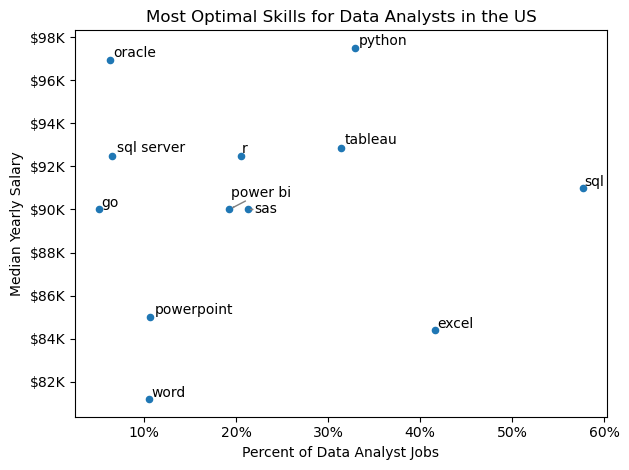

In [20]:
from adjustText import adjust_text
df_da_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_da_skills_high_demand.index):
    texts.append(plt.text(df_da_skills_high_demand['skill_percent'].iloc[i], df_da_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
import matplotlib.ticker as tt
from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.xaxis.set_major_formatter(tt.PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(plt.FuncFormatter((lambda x, _ : f'${int(x/1000)}K')))

# Adjust layout and display plot
plt.tight_layout()
plt.show()
